In [ ]:
import numpy as np
import warnings
import IPython
warnings.filterwarnings('ignore')

In [ ]:
!pip install cmfrec surprise pgeocode
IPython.display.clear_output()

## Preprocessing and Data Visualization

### Downloading the data

In [ ]:
!gdown 15QeQgmjoeBxRDEOFPSrMr8eIvwk6QgUQ
!gdown 1XJpSzv-UMeSmCCOdyZviRF4XCxiKJUrk
!gdown 1-xsSNizet0ruiMgKLWRcmme8L_iDejhc

Downloading...
From: https://drive.google.com/uc?id=15QeQgmjoeBxRDEOFPSrMr8eIvwk6QgUQ
To: /content/zee-movies.dat
100% 171k/171k [00:00<00:00, 4.23MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XJpSzv-UMeSmCCOdyZviRF4XCxiKJUrk
To: /content/zee-ratings.dat
100% 24.6M/24.6M [00:00<00:00, 27.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-xsSNizet0ruiMgKLWRcmme8L_iDejhc
To: /content/zee-users.dat
100% 134k/134k [00:00<00:00, 3.30MB/s]


In [ ]:
!head -n 12 zee-movies.dat

Movie ID::Title::Genres
1::Toy Story (1995)::Animation|Children's|Comedy
2::Jumanji (1995)::Adventure|Children's|Fantasy
3::Grumpier Old Men (1995)::Comedy|Romance
4::Waiting to Exhale (1995)::Comedy|Drama
5::Father of the Bride Part II (1995)::Comedy
6::Heat (1995)::Action|Crime|Thriller
7::Sabrina (1995)::Comedy|Romance
8::Tom and Huck (1995)::Adventure|Children's
9::Sudden Death (1995)::Action
10::GoldenEye (1995)::Action|Adventure|Thriller
11::American President, The (1995)::Comedy|Drama|Romance


In [ ]:
!head -n 10 zee-ratings.dat

UserID::MovieID::Rating::Timestamp
1::1193::5::978300760
1::661::3::978302109
1::914::3::978301968
1::3408::4::978300275
1::2355::5::978824291
1::1197::3::978302268
1::1287::5::978302039
1::2804::5::978300719
1::594::4::978302268


In [ ]:
!head -n 10 zee-users.dat

UserID::Gender::Age::Occupation::Zip-code
1::F::1::10::48067
2::M::56::16::70072
3::M::25::15::55117
4::M::45::7::02460
5::M::25::20::55455
6::F::50::9::55117
7::M::35::1::06810
8::M::25::12::11413
9::M::25::17::61614


In [ ]:
!sed "s/,//g" zee-movies.dat> zee-movies
!sed "s/::/,/g" zee-movies> zee-movies.csv
!head -n 12 zee-movies.csv

Movie ID,Title,Genres
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children's
9,Sudden Death (1995),Action
10,GoldenEye (1995),Action|Adventure|Thriller
11,American President The (1995),Comedy|Drama|Romance


In [ ]:
!sed "s/::/,/g" zee-ratings.dat > zee-ratings.csv
!sed "s/::/,/g" zee-users.dat > zee-users.csv

In [ ]:
import pandas as pd

zee_movies = pd.read_csv("zee-movies.csv",encoding='latin-1')
zee_movies.columns = ['MovieID', 'Title', 'Genres']
zee_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
zee_movies["Year"] = zee_movies['Title'].astype(str).apply(lambda x: x[-5:-1]).astype(int)
# zee_movies['Title'] = zee_movies['Title'].astype(str).apply(lambda x: x[:-6])
zee_movies.head()

,MovieID,Title,Genres,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [ ]:
zee_ratings = pd.read_csv("zee-ratings.csv")
zee_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
zee_users = pd.read_csv("zee-users.csv")
zee_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
zee_users['Zip-code'].unique()

array(['48067', '70072', '55117', ..., '78734', '76006', '14706'],
      dtype=object)

### Using GeoCode Library for Zip-Code

In [ ]:
import pgeocode

nomi = pgeocode.Nominatim('us')
cols = ['postal_code','place_name','state_name','state_code','county_name','county_code']
geo = nomi.query_postal_code(zee_users['Zip-code'].unique())[cols]
geo

,postal_code,place_name,state_name,state_code,county_name,county_code
0,48067,Royal Oak,Michigan,MI,Oakland,125.0
1,70072,Marrero,Louisiana,LA,Jefferson Parish,51.0
2,55117,Saint Paul,Minnesota,MN,Ramsey,123.0
3,02460,Newtonville,Massachusetts,MA,Middlesex,17.0
4,55455,Minneapolis,Minnesota,MN,Hennepin,53.0
...,...,...,...,...,...,...
3434,32618,Archer,Florida,FL,Alachua,1.0
3435,45123,Greenfield,Ohio,OH,Highland,71.0
3436,78734,Austin,Texas,TX,Travis,453.0
3437,76006,Arlington,Texas,TX,Tarrant,439.0


In [ ]:
geo.nunique()

postal_code    3439
place_name     1757
state_name       51
state_code       51
county_name     643
county_code     158
dtype: int64

In [ ]:
geo['state_name'].unique()

array(['Michigan', 'Louisiana', 'Minnesota', 'Massachusetts',
       'Connecticut', 'New York', 'Illinois', 'California', 'Maine',
       'Florida', 'Virginia', 'Maryland', 'Washington', 'Wisconsin',
       'Pennsylvania', 'Kansas', 'Texas', 'Arkansas', nan, 'Georgia',
       'South Dakota', 'Arizona', 'New Jersey', 'Ohio', 'North Carolina',
       'Missouri', 'Oregon', 'Tennessee', 'Idaho', 'Iowa', 'Alaska',
       'District of Columbia', 'South Carolina', 'Indiana',
       'New Hampshire', 'Utah', 'West Virginia', 'Colorado',
       'Mississippi', 'Nebraska', 'Nevada', 'Oklahoma', 'Hawaii',
       'Delaware', 'Kentucky', 'Rhode Island', 'New Mexico', 'Wyoming',
       'Montana', 'North Dakota', 'Alabama', 'Vermont', None],
      dtype=object)

In [ ]:
zee_users_ratings = pd.merge(zee_ratings, zee_users, on = 'UserID',how = 'left')
zee_users_ratings.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [ ]:
len(zee_users), len(zee_ratings), len(zee_users_ratings)

(6040, 1000209, 1000209)

In [ ]:
zee_users_ratings.groupby(by='Age').agg('count')\
    .sort_values('UserID',ascending=False)\
    .reset_index()[['Age', 'UserID']]

,Age,UserID
0,25,395556
1,35,199003
2,18,183536
3,45,83633
4,50,72490
5,56,38780
6,1,27211


In [ ]:
zee_users_ratings.groupby(by='Occupation').agg('count')\
    .sort_values('UserID',ascending=False)\
    .reset_index()[['Occupation', 'UserID']][:5]

,Occupation,UserID
0,4,131032
1,0,130499
2,7,105425
3,1,85351
4,17,72816


In [ ]:
zee_users_ratings.groupby(by='Gender').agg('count')\
    .sort_values('UserID',ascending=False)\
    .reset_index()[['Gender', 'UserID']]

,Gender,UserID
0,M,753769
1,F,246440


In [ ]:
zee_movies['Decade'] = zee_movies['Year'].map(lambda x: (x%100)//10*10)

In [ ]:
zee_movies[zee_movies['Year']==1979].head()

,MovieID,Title,Genres,Year,Decade
1064,1080,Monty Python's Life of Brian (1979),Comedy,1979,70
1145,1161,Tin Drum The (Blechtrommel Die) (1979),Drama,1979,70
1190,1208,Apocalypse Now (1979),Drama|War,1979,70
1196,1214,Alien (1979),Action|Horror|Sci-Fi|Thriller,1979,70
1213,1232,Stalker (1979),Mystery|Sci-Fi,1979,70


In [ ]:
zee_movies.groupby(by='Decade').agg('count')\
    .sort_values('MovieID',ascending=False)\
    .reset_index()[['Decade', 'MovieID']][:5]

,Decade,MovieID
0,90,2283
1,80,598
2,70,247
3,60,191
4,50,168


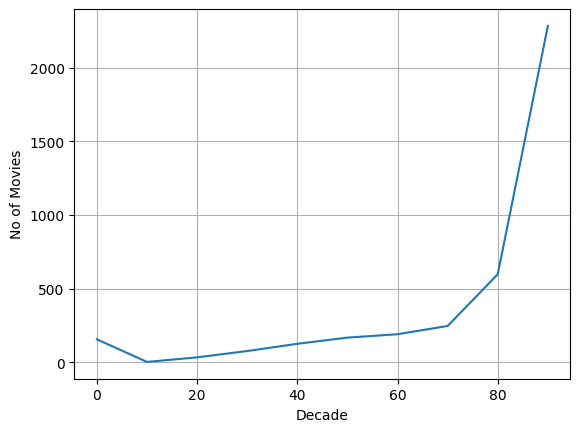

In [ ]:
import matplotlib.pyplot as plt

_z_ = zee_movies.groupby(by='Decade').agg('count').reset_index()

plt.plot(_z_['Decade'],_z_["MovieID"])
plt.xlabel("Decade")
plt.ylabel("No of Movies")
plt.grid()
plt.show()

In [ ]:
_z_.head()

,Decade,MovieID,Title,Genres,Year
0,0,156,156,156,156
1,10,3,3,3,3
2,20,34,34,34,34
3,30,77,77,77,77
4,40,126,126,126,126


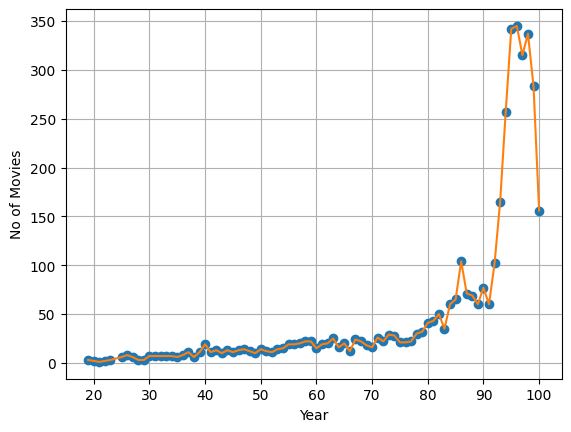

In [ ]:
_z_ = zee_movies.groupby(by='Year').agg('count').reset_index()
plt.plot(_z_['Year']-1900,_z_["MovieID"],'o')
plt.plot(_z_['Year']-1900,_z_["MovieID"])
plt.xlabel("Year")
plt.ylabel("No of Movies")
plt.grid()
plt.show()

### Merging all dataframes

In [ ]:
df_merged = pd.merge(zee_users_ratings, zee_movies, on='MovieID',how='left')
df_merged.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,Year,Decade
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975,70
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,1996,90
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance,1964,60
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama,2000,0
4,1,2355,5,978824291,F,1,10,48067,Bug's Life A (1998),Animation|Children's|Comedy,1998,90


In [ ]:
df = df_merged.drop(['UserID', 'MovieID'], axis = 1)
df.head()

,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,Year,Decade
0,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975,70
1,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,1996,90
2,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance,1964,60
3,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama,2000,0
4,5,978824291,F,1,10,48067,Bug's Life A (1998),Animation|Children's|Comedy,1998,90


In [ ]:
df.groupby('Title')[['Rating']].sum()\
    .sort_values('Rating', ascending=False)\
    .reset_index()[:5]

,Title,Rating
0,American Beauty (1999),14800
1,Star Wars: Episode IV - A New Hope (1977),13321
2,Star Wars: Episode V - The Empire Strikes Back...,12836
3,Star Wars: Episode VI - Return of the Jedi (1983),11598
4,Saving Private Ryan (1998),11507


In [ ]:
df.groupby('Title')[['Rating']].mean()\
    .sort_values('Rating', ascending=False)\
    .reset_index()[:5]

,Title,Rating
0,Ulysses (Ulisse) (1954),5.0
1,Lured (1947),5.0
2,Follow the Bitch (1998),5.0
3,Bittersweet Motel (2000),5.0
4,Song of Freedom (1936),5.0


In [ ]:
df.groupby('Title')['Rating'].agg(['count','sum','mean'])\
    .sort_values(['count','sum','mean'], ascending=[False,False, False])\
    .reset_index()[:5]

,Title,count,sum,mean
0,American Beauty (1999),3428,14800,4.317386
1,Star Wars: Episode IV - A New Hope (1977),2991,13321,4.453694
2,Star Wars: Episode V - The Empire Strikes Back...,2990,12836,4.292977
3,Star Wars: Episode VI - Return of the Jedi (1983),2883,11598,4.022893
4,Jurassic Park (1993),2672,10057,3.763847


In [ ]:
pd.to_datetime(df_merged['Timestamp'],unit='s')[1000:][:5]

1000   2000-12-31 01:19:01
1001   2001-01-17 23:51:25
1002   2001-01-17 23:48:50
1003   2000-12-31 02:01:14
1004   2001-01-27 23:37:13
Name: Timestamp, dtype: datetime64[ns]

In [ ]:
pd.Timestamp(df_merged['Timestamp'][0], unit='s')

Timestamp('2000-12-31 22:12:40')

In [ ]:
pd.Timestamp(df_merged['Timestamp'][0], unit='s').month_name()

'December'

In [ ]:
weekday = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday[pd.Timestamp(2023, 2, 10).day_of_week]

'Friday'

### Deriving some features based on timestamp of watching

In [ ]:
"""
slot_user is defined as different slot
0 -> 0 hrs-4hrs
1 -> 4hrs-8hrs
2 -> 8hrs -12 hrs
3 -> 12hrs-16hrs
4 -> 16hrs-20hrs
5 -> 20hrs-24hrs
"""
df_merged['Weekday_user'] = df_merged['Timestamp'].transform(lambda x: pd.Timestamp(x,unit='s').day_name())
df_merged['year_user'] = df_merged['Timestamp'].transform(lambda x: pd.Timestamp(x,unit='s').year)
df_merged['month_user'] = df_merged['Timestamp'].transform(lambda x: pd.Timestamp(x,unit='s').month_name())
df_merged['slot_user'] = df_merged['Timestamp'].transform(lambda x: pd.Timestamp(x,unit='s').hour//4)
df_merged.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,Year,Decade,Weekday_user,year_user,month_user,slot_user
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975,70,Sunday,2000,December,5
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,1996,90,Sunday,2000,December,5
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance,1964,60,Sunday,2000,December,5
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama,2000,0,Sunday,2000,December,5
4,1,2355,5,978824291,F,1,10,48067,Bug's Life A (1998),Animation|Children's|Comedy,1998,90,Saturday,2001,January,5


In [ ]:
df_merged.groupby('slot_user')[['Title']].count()\
    .sort_values('Title', ascending = False)\
    .reset_index()

,slot_user,Title
0,0,235084
1,5,230373
2,4,220858
3,1,159013
4,3,103388
5,2,51493


In [ ]:
df_merged.groupby('slot_user')[['UserID']].nunique()\
    .sort_values('UserID', ascending = False)\
    .reset_index()

,slot_user,UserID
0,5,2641
1,4,2517
2,0,2515
3,1,1678
4,3,1390
5,2,593


In [ ]:
df_merged.groupby('Weekday_user')[['Title']].count()\
    .sort_values('Title', ascending = False)\
    .reset_index()

,Weekday_user,Title
0,Monday,173931
1,Tuesday,159272
2,Sunday,144978
3,Thursday,142722
4,Wednesday,141176
5,Friday,129438
6,Saturday,108692


In [ ]:
df_merged.groupby(['Weekday_user', 'slot_user'])[['Title']].count()\
    .sort_values('Title', ascending = False)\
    .reset_index()[:5]

,Weekday_user,slot_user,Title
0,Tuesday,0,42580
1,Sunday,0,37679
2,Monday,4,37072
3,Monday,5,36563
4,Wednesday,0,36400


In [ ]:
df_merged.groupby(['month_user','year_user'])[['MovieID']].count()\
    .sort_values("MovieID",ascending = False)\
    .reset_index()[:5]

,month_user,year_user,MovieID
0,November,2000,290793
1,August,2000,182109
2,December,2000,113487
3,July,2000,90334
4,May,2000,67437


In [ ]:
y = df_merged.groupby('UserID')[['Timestamp']].min()\
        .reset_index()

y['year'] = y['Timestamp'].transform(lambda x: pd.Timestamp(x,unit='s').year)
y['month'] = y['Timestamp'].transform(lambda x: pd.Timestamp(x,unit='s').month_name())

### At which month, most new users joined
y.groupby(['year', 'month'])[['UserID']].count()\
    .sort_values('UserID', ascending = False)\
    .reset_index()[:5]


,year,month,UserID
0,2000,November,2106
1,2000,August,1101
2,2000,December,669
3,2000,July,634
4,2000,May,466


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 16 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   UserID        1000209 non-null  int64 
 1   MovieID       1000209 non-null  int64 
 2   Rating        1000209 non-null  int64 
 3   Timestamp     1000209 non-null  int64 
 4   Gender        1000209 non-null  object
 5   Age           1000209 non-null  int64 
 6   Occupation    1000209 non-null  int64 
 7   Zip-code      1000209 non-null  object
 8   Title         1000209 non-null  object
 9   Genres        1000209 non-null  object
 10  Year          1000209 non-null  int64 
 11  Decade        1000209 non-null  int64 
 12  Weekday_user  1000209 non-null  object
 13  year_user     1000209 non-null  int64 
 14  month_user    1000209 non-null  object
 15  slot_user     1000209 non-null  int64 
dtypes: int64(10), object(6)
memory usage: 129.7+ MB


### List of movies and the number of movies watched by each user

In [ ]:
## user movie list
user_movie_list = df_merged.groupby('UserID')['Title'].apply(lambda x: ','.join(x)).reset_index()
user_movie_list['no_movies'] = user_movie_list['Title'].apply(lambda x: len(x.split(',')))
user_movie_list

,UserID,Title,no_movies
0,1,"One Flew Over the Cuckoo's Nest (1975),James a...",53
1,2,"Shine (1996),Verdict The (1982),Shall We Dance...",129
2,3,"Animal House (1978),Full Monty The (1997),Miss...",51
3,4,"Hustler The (1961),Star Wars: Episode VI - Ret...",21
4,5,"Who Framed Roger Rabbit? (1988),Gods and Monst...",198
...,...,...,...
6035,6036,"Wedding Gift The (1994),Spanking the Monkey (1...",888
6036,6037,"Terminator 2: Judgment Day (1991),Insider The ...",202
6037,6038,"Walkabout (1971),Gone with the Wind (1939),Har...",20
6038,6039,"Aladdin (1992),Doctor Zhivago (1965),Evita (19...",123


In [ ]:
## Top 20 movie watcher
user_movie_list.sort_values('no_movies',ascending=False)\
    .reset_index(drop=True)[:20]

,UserID,Title,no_movies
0,4169,"Pawnbroker The (1965),Wedding Gift The (1994),...",2314
1,1680,"Who Framed Roger Rabbit? (1988),Touch of Evil ...",1850
2,4277,"Pawnbroker The (1965),Slingshot The (Kådisbell...",1743
3,1941,"Who Framed Roger Rabbit? (1988),Nikita (La Fem...",1595
4,1181,"Who Framed Roger Rabbit? (1988),Touch of Evil ...",1521
5,889,"Pawnbroker The (1965),Who Framed Roger Rabbit?...",1518
6,3618,"Pawnbroker The (1965),Who Framed Roger Rabbit?...",1344
7,2063,"Who Framed Roger Rabbit? (1988),Switchblade Si...",1323
8,1150,"Pawnbroker The (1965),Touch of Evil (1958),Mel...",1302
9,1015,"Who Framed Roger Rabbit? (1988),Touch of Evil ...",1286


In [ ]:
pd.pivot_table(df_merged,values='year_user' ,index = ['UserID'], columns= ['Title'], aggfunc='count',fill_value=0)

Title,$1000000 Duck (1971),'Night Mother (1986),'Til There Was You (1997),'burbs The (1989),...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Poisoner's Handbook The (1995),Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),Zed & Two Noughts A (1985),Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0,1,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
6037,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creating pivot table based on user-item interaction

#### Watch Count based

In [ ]:
x = pd.merge(zee_ratings, zee_movies, on = 'MovieID', how='left')
user_item = pd.pivot_table(x,values='Rating' ,index = ['UserID'], columns= ['Title'], aggfunc='count',fill_value=0)
user_item.head()

Title,$1000000 Duck (1971),'Night Mother (1986),'Til There Was You (1997),'burbs The (1989),...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Poisoner's Handbook The (1995),Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),Zed & Two Noughts A (1985),Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Rating Based

In [ ]:
user_item_rating = pd.pivot_table(x,values='Rating' ,index = ['UserID'], columns= ['Title'], aggfunc='sum',fill_value=0)
user_item_rating.head()

Title,$1000000 Duck (1971),'Night Mother (1986),'Til There Was You (1997),'burbs The (1989),...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Poisoner's Handbook The (1995),Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),Zed & Two Noughts A (1985),Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x[(x['UserID']==18)]

,UserID,MovieID,Rating,Timestamp,Title,Genres,Year,Decade
1940,18,2987,5,978154285,Who Framed Roger Rabbit? (1988),Adventure|Animation|Film-Noir,1988,80
1941,18,2989,5,978153344,For Your Eyes Only (1981),Action,1981,80
1942,18,2622,5,978152574,Midsummer Night's Dream A (1999),Comedy|Fantasy,1999,90
1943,18,648,4,978153370,Mission: Impossible (1996),Action|Adventure|Mystery,1996,90
1944,18,2628,4,978152515,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Fantasy|Sci-Fi,1999,90
...,...,...,...,...,...,...,...,...
2240,18,2042,1,978155392,D2: The Mighty Ducks (1994),Children's|Comedy,1994,90
2241,18,1240,5,978153104,Terminator The (1984),Action|Sci-Fi|Thriller,1984,80
2242,18,2116,4,978154452,Lord of the Rings The (1978),Adventure|Animation|Children's|Sci-Fi,1978,70
2243,18,1242,5,978152999,Glory (1989),Action|Drama|War,1989,80


## Cosine Similarity

### user cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

user_user_similarity_matrix = pd.DataFrame(cosine_similarity(user_item),index= user_item.index, columns=user_item.index )

In [ ]:
user_user_similarity_matrix

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.084657,0.115406,0.119898,0.097618,0.163017,0.049341,0.116508,0.200125,0.240081,...,0.153875,0.080816,0.053200,0.029975,0.073880,0.161333,0.115976,0.000000,0.185781,0.126454
2,0.084657,1.000000,0.147945,0.153704,0.125142,0.114939,0.284641,0.201633,0.162482,0.215441,...,0.098630,0.086335,0.227331,0.019213,0.157851,0.218640,0.185845,0.059062,0.063510,0.224092
3,0.115406,0.147945,1.000000,0.152783,0.059708,0.099710,0.150899,0.083139,0.122407,0.216773,...,0.098039,0.109847,0.144620,0.000000,0.092051,0.140971,0.108376,0.093934,0.101007,0.151659
4,0.119898,0.153704,0.152783,1.000000,0.046524,0.025898,0.156772,0.092545,0.084781,0.130767,...,0.152783,0.106990,0.366234,0.000000,0.091287,0.139135,0.107476,0.097590,0.059028,0.153623
5,0.097618,0.125142,0.059708,0.046524,1.000000,0.059039,0.165932,0.217001,0.248495,0.127761,...,0.109465,0.027875,0.082572,0.046524,0.152894,0.286182,0.165008,0.047673,0.019224,0.223212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.161333,0.218640,0.140971,0.139135,0.286182,0.095582,0.126570,0.227707,0.211862,0.326780,...,0.136272,0.177693,0.194953,0.080552,0.278759,1.000000,0.309307,0.112556,0.196677,0.365269
6037,0.115976,0.185845,0.108376,0.107476,0.165008,0.083502,0.126370,0.131292,0.218686,0.238925,...,0.157637,0.241477,0.109001,0.122830,0.117734,0.309307,1.000000,0.047199,0.228389,0.396260
6038,0.000000,0.059062,0.093934,0.097590,0.047673,0.079612,0.000000,0.018966,0.086874,0.111664,...,0.125245,0.109632,0.057735,0.000000,0.040089,0.112556,0.047199,1.000000,0.141134,0.133199


### item cosine similarity

In [ ]:
movie_movie_similarity_matrix = pd.DataFrame(cosine_similarity(user_item.T),index= user_item.columns, columns=user_item.columns )
movie_movie_similarity_matrix

Title,$1000000 Duck (1971),'Night Mother (1986),'Til There Was You (1997),'burbs The (1989),...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Poisoner's Handbook The (1995),Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),Zed & Two Noughts A (1985),Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
Title,,,,,,,,,,,,,,,,,,,,,
$1000000 Duck (1971),1.000000,0.078598,0.045596,0.094445,0.058270,0.000000,0.068351,0.200573,0.155103,0.112605,...,0.036993,0.092891,0.000000,0.047240,0.0,0.061056,0.066331,0.000000,0.102839,0.024357
'Night Mother (1986),0.078598,1.000000,0.132599,0.130462,0.160982,0.000000,0.090351,0.130737,0.093971,0.105946,...,0.053789,0.092092,0.075593,0.160275,0.0,0.133169,0.075781,0.000000,0.000000,0.082639
'Til There Was You (1997),0.045596,0.132599,1.000000,0.127467,0.058982,0.098058,0.125794,0.110848,0.130834,0.094985,...,0.031204,0.078356,0.000000,0.106261,0.0,0.025751,0.111903,0.000000,0.057831,0.075335
'burbs The (1989),0.094445,0.130462,0.127467,1.000000,0.175114,0.000000,0.208450,0.285191,0.231856,0.194432,...,0.116342,0.212467,0.018167,0.170580,0.0,0.053340,0.195365,0.000000,0.047915,0.139022
...And Justice for All (1979),0.058270,0.160982,0.058982,0.175114,1.000000,0.000000,0.083059,0.196831,0.126329,0.208500,...,0.103682,0.174781,0.112084,0.115427,0.0,0.105309,0.114406,0.050125,0.000000,0.126033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zed & Two Noughts A (1985),0.061056,0.133169,0.025751,0.053340,0.105309,0.000000,0.014037,0.054686,0.029199,0.044891,...,0.062677,0.085847,0.117444,0.142291,0.0,1.000000,0.096330,0.131306,0.000000,0.146733
Zero Effect (1998),0.066331,0.075781,0.111903,0.195365,0.114406,0.000000,0.191712,0.160043,0.117823,0.150952,...,0.181577,0.180604,0.054681,0.204270,0.0,0.096330,1.000000,0.040757,0.024037,0.247653
Zero Kelvin (Kjærlighetens kjøtere) (1995),0.000000,0.000000,0.000000,0.000000,0.050125,0.000000,0.000000,0.029748,0.000000,0.028490,...,0.079556,0.036322,0.000000,0.000000,0.0,0.131306,0.040757,1.000000,0.000000,0.034922


In [ ]:
# User user similarity based approach

user_id = 5
user_user_similarity_matrix[user_user_similarity_matrix>.05][user_id].sort_values(ascending=False)[1:11]

UserID
1484    0.372980
5452    0.362666
3054    0.353248
225     0.353145
5718    0.352970
1407    0.352945
4607    0.351378
2918    0.346803
5826    0.346222
5749    0.345220
Name: 5, dtype: float64

### Item based prediction

In [ ]:
df_merged[df_merged['Title']=='Liar Liar (1997)']

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,Year,Decade,Weekday_user,year_user,month_user,slot_user
324,5,1485,3,978246576,M,25,20,55455,Liar Liar (1997),Comedy,1997,90,Sunday,2000,December,1
1628,15,1485,3,978198548,M,25,7,22903,Liar Liar (1997),Comedy,1997,90,Saturday,2000,December,4
2738,22,1485,1,978154074,M,18,15,53706,Liar Liar (1997),Comedy,1997,90,Saturday,2000,December,1
3624,26,1485,1,978139220,M,25,7,23112,Liar Liar (1997),Comedy,1997,90,Saturday,2000,December,0
4172,31,1485,2,978121885,M,56,7,06840,Liar Liar (1997),Comedy,1997,90,Friday,2000,December,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986879,5957,1485,3,958405408,M,18,20,02038,Liar Liar (1997),Comedy,1997,90,Monday,2000,May,3
987303,5960,1485,4,957029339,F,45,0,70460,Liar Liar (1997),Comedy,1997,90,Saturday,2000,April,4
989036,5972,1485,4,963614933,F,25,20,55428,Liar Liar (1997),Comedy,1997,90,Friday,2000,July,5
993099,6000,1485,4,956884024,M,45,17,30075,Liar Liar (1997),Comedy,1997,90,Friday,2000,April,0


In [ ]:
movie_id = 1485
movie_title = 'Liar Liar (1997)'
movie_movie_similarity_matrix[movie_title].sort_values(ascending=False)[1:11]

Title
Mrs. Doubtfire (1993)                                 0.576923
Dumb & Dumber (1994)                                  0.552042
Home Alone (1990)                                     0.536925
Ace Ventura: Pet Detective (1994)                     0.529225
Wayne's World (1992)                                  0.516403
Wedding Singer The (1998)                             0.515377
Austin Powers: International Man of Mystery (1997)    0.512368
League of Their Own A (1992)                          0.510794
There's Something About Mary (1998)                   0.502326
Addams Family The (1991)                              0.491602
Name: Liar Liar (1997), dtype: float64

### function used for recommendation

In [ ]:
def recommend_item_based_movies(movie_title, similarity_matrix, n=10):

    return similarity_matrix[movie_title].sort_values(ascending=False)[1:(n+1)]

In [ ]:
recommend_item_based_movies(movie_title, movie_movie_similarity_matrix)

Title
Mrs. Doubtfire (1993)                                 0.576923
Dumb & Dumber (1994)                                  0.552042
Home Alone (1990)                                     0.536925
Ace Ventura: Pet Detective (1994)                     0.529225
Wayne's World (1992)                                  0.516403
Wedding Singer The (1998)                             0.515377
Austin Powers: International Man of Mystery (1997)    0.512368
League of Their Own A (1992)                          0.510794
There's Something About Mary (1998)                   0.502326
Addams Family The (1991)                              0.491602
Name: Liar Liar (1997), dtype: float64

## Setting up **sim_options** in Surprise Library
Wiki page
- [Similarities module](https://surprise.readthedocs.io/en/stable/similarities.html#module-surprise.similarities)
- [Usage in algorithms]()

1. There are four types of similarity options.
    1. cosine
    1. msd (default)
    1. pearson
    1. pearson_baseline

1. When `user_based` is **True**, `min_support` is need to be used.
1. For item based, `user_based` is **False**, no need to use `min_support`.
1. For `pearson_baseline`, `shrinkage` factor is used.

In [ ]:
from surprise.model_selection import cross_validate, GridSearchCV, KFold
from surprise.prediction_algorithms.matrix_factorization import SVD, SVDpp,NMF
from surprise.prediction_algorithms.knns import  KNNBaseline, KNNBasic, KNNWithZScore

sim_options = {

    'cosine' : {
                "name": "cosine",
                "user_based": False,  # compute  similarities between items
            },

    'pearson_0': {
                "name": "pearson_baseline",
                "user_based": False,  # compute  similarities between items
                "shrinkage": 0      # shrinkage default is 100
            },
    'pearson_50': {
                "name": "pearson_baseline",
                "user_based": False,  # compute  similarities between items
                "shrinkage": 50      # shrinkage default is 100
            },
    'pearson_100': {
                "name": "pearson_baseline",
                "user_based": False,  # compute  similarities between items
                "shrinkage": 100      # shrinkage default is 100
            },

}

### Combining genres

In [ ]:
m = zee_movies.copy()
m['Genres'] = m['Genres'].str.split('|')
m = m.explode('Genres').reset_index(drop=True)
m.groupby('Genres')[['MovieID']].count()\
    .sort_values('MovieID',ascending=False)\
    .reset_index()

,Genres,MovieID
0,Drama,1603
1,Comedy,1200
2,Action,503
3,Thriller,492
4,Romance,471
5,Horror,343
6,Adventure,283
7,Sci-Fi,276
8,Children's,251
9,Crime,211


In [ ]:
m = m.pivot_table(index='MovieID', columns='Genres', values='Title',
                  aggfunc='count',fill_value=0).reset_index()
m.head()

Genres,MovieID,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
list(df.columns)

['Rating',
 'Timestamp',
 'Gender',
 'Age',
 'Occupation',
 'Zip-code',
 'Title',
 'Genres',
 'Year',
 'Decade']

### Assumption
Before training, I want to assume something.
- There is no effect of zipcode, month, year and timestamp on rating.

In [ ]:
cols = [
        'Genres', 'Decade','Title','Year','Zip-code',
        'Timestamp','year_user','month_user'
        ]
df = pd.merge(df_merged.drop(cols, axis=1),m,on='MovieID')
df.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Weekday_user,slot_user,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,F,1,10,Sunday,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,M,56,16,Sunday,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,4,M,25,12,Saturday,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,M,25,7,Saturday,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,M,50,1,Saturday,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
gender_mapper = {'M':1, 'F': 0}
weekday_mapper = {
    'Sunday' : 1,
    'Monday' : 2,
    'Tuesday': 3,
    'Wednesday':4,
    'Thursday': 5,
    'Friday' :  6,
    'Saturday': 7,
}

df['Weekday_user'] = df['Weekday_user'].map(weekday_mapper)
df['Gender'] = df['Gender'].map(gender_mapper)
df.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Weekday_user,slot_user,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,0,1,10,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,1,56,16,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,4,1,25,12,7,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,1,25,7,7,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,1,50,1,7,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model-1: CMF

In [ ]:
from cmfrec import CMF

model_cmf = CMF(method="als", k=40, lambda_=1e+1,niter=10)
data = df[['UserID','MovieID','Rating']].copy()
data.columns = ['UserId','ItemId','Rating']
model_cmf.fit(data)

Starting ALS optimization routine

Updating B ... done
Updating A ... done
	Completed ALS iteration  1

Updating B ... done
Updating A ... done
	Completed ALS iteration  2

Updating B ... done
Updating A ... done
	Completed ALS iteration  3

Updating B ... done
Updating A ... done
	Completed ALS iteration  4

Updating B ... done
Updating A ... done
	Completed ALS iteration  5

Updating B ... done
Updating A ... done
	Completed ALS iteration  6

Updating B ... done
Updating A ... done
	Completed ALS iteration  7

Updating B ... done
Updating A ... done
	Completed ALS iteration  8

Updating B ... done
Updating A ... done
	Completed ALS iteration  9

Updating B ... done
Updating A ... done
	Completed ALS iteration 10

ALS procedure terminated successfully


Collective matrix factorization model
(explicit-feedback variant)


In [ ]:
y_pred = np.round(model_cmf.predict(data['UserId'],data['ItemId']))

In [ ]:
def mae(y_true,y_pred):
    return np.mean(np.abs(y_true-y_pred))

def mse(y_true,y_pred):
    return np.mean((y_true-y_pred)**2)

def rmse(y_true,y_pred):
    return np.mean((y_true-y_pred)**2)**.5


In [ ]:
mae(data['Rating'], y_pred)

0.46539873

In [ ]:
mse(data['Rating'], y_pred)

0.521439

In [ ]:
rmse(data['Rating'], y_pred)

0.722107343727597

In [ ]:
# Compute top-N highest-predicted items for a new user, given 'X'
top10 = model_cmf.topN_warm(X_col=[movie_id],X_val=[5])
top10

array([ 318,  527, 2905,   50, 2019,  912, 1198, 1207, 2762,  904])

In [ ]:
zee_movies[zee_movies['MovieID'].isin(top10)]

,MovieID,Title,Genres,Year,Decade
49,50,Usual Suspects The (1995),Crime|Thriller,1995,90
315,318,Shawshank Redemption The (1994),Drama,1994,90
523,527,Schindler's List (1993),Drama|War,1993,90
892,904,Rear Window (1954),Mystery|Thriller,1954,50
900,912,Casablanca (1942),Drama|Romance|War,1942,40
1180,1198,Raiders of the Lost Ark (1981),Action|Adventure,1981,80
1189,1207,To Kill a Mockingbird (1962),Drama,1962,60
1950,2019,Seven Samurai (The Magnificent Seven) (Shichin...,Action|Drama,1954,50
2693,2762,Sixth Sense The (1999),Thriller,1999,90
2836,2905,Sanjuro (1962),Action|Adventure,1962,60


### Model-2

In [ ]:
model_with_sideinfo = CMF(method="als", k=40, lambda_=1e+1, w_main=0.5, w_user=0.25, w_item=0.25)
# user_side_info =
# item_side_info = ''
# model_with_sideinfo.fit(X=data, U=user_side_info, I=item_side_info)


### Model-3: SVD

In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate, GridSearchCV, KFold
from surprise.prediction_algorithms.matrix_factorization import SVD, SVDpp,NMF
from surprise.prediction_algorithms.knns import  KNNBaseline, KNNBasic, KNNWithZScore


model = KNNBaseline(sim_options=sim_options['cosine'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
reader = Reader(rating_scale=(1,5))
dataset =  Dataset.load_from_df(data, reader)
trainset, testset = train_test_split(dataset, test_size=.25, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Sample run

In [ ]:
model_svd = SVD()
model_svd.fit(trainset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
y_pred = model_svd.test(testset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2.0

In [ ]:
from surprise import accuracy as acc

acc.mse(y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MSE: 0.7691


0.7691299601951829

In [ ]:
acc.rmse(y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE: 0.8770


0.8770005474315183

In [ ]:
acc.mae(y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MAE:  0.6895


0.6895451481592956

In [ ]:
acc.fcp(y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FCP:  0.7454


0.7453918978897055

In [ ]:
y_pred=pd.DataFrame(y_pred)
y_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,uid,iid,r_ui,est,details
0,1404,2470,2.0,2.628602,{'was_impossible': False}
1,3013,235,4.0,2.851811,{'was_impossible': False}
2,49,2985,3.0,3.590811,{'was_impossible': False}
3,4715,272,3.0,3.706089,{'was_impossible': False}
4,3426,6,4.0,3.914263,{'was_impossible': False}
...,...,...,...,...,...
250048,1509,2716,4.0,3.678003,{'was_impossible': False}
250049,3756,1411,5.0,4.383624,{'was_impossible': False}
250050,3609,1552,3.0,3.214352,{'was_impossible': False}
250051,4169,3639,4.0,3.526623,{'was_impossible': False}


In [ ]:
## custom metrics/ model evaluation
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_pred-y_true)/y_true)

## Sample
mape([1,2],[1,4])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5

In [ ]:
mape(y_pred.r_ui, y_pred.est)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.2654868190906138

#### Training with KFold cross validation

In [ ]:
kf = KFold(n_splits=5,random_state=42)
metrics = {
    'Train_MSE' : [],
    'Train_RMSE': [],
    'Train_FCP' : [],
    'Train_MAE' : [],
    'Test_MSE' : [],
    'Test_RMSE': [],
    'Test_FCP' : [],
    'Test_MAE' : [],
}
svd =  SVD()

for train,test in kf.split(dataset):
    svd.fit(train)
    train_pred = svd.test(train.build_testset())
    test_pred = svd.test(test)

    metrics['Train_MSE'].append(acc.mse(train_pred))
    metrics['Train_RMSE'].append(acc.rmse(train_pred))
    metrics['Train_FCP'].append(acc.fcp(train_pred))
    metrics['Train_MAE'].append(acc.mae(train_pred))

    metrics['Test_MSE'].append(acc.mse(test_pred))
    metrics['Test_RMSE'].append(acc.rmse(test_pred))
    metrics['Test_FCP'].append(acc.fcp(test_pred))
    metrics['Test_MAE'].append(acc.mae(test_pred))





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MSE: 0.4494
RMSE: 0.6704
FCP:  0.8678
MAE:  0.5301
MSE: 0.7640
RMSE: 0.8741
FCP:  0.7467
MAE:  0.6856
MSE: 0.4489
RMSE: 0.6700
FCP:  0.8683
MAE:  0.5299
MSE: 0.7695
RMSE: 0.8772
FCP:  0.7431
MAE:  0.6878
MSE: 0.4488
RMSE: 0.6700
FCP:  0.8691
MAE:  0.5298
MSE: 0.7589
RMSE: 0.8711
FCP:  0.7460
MAE:  0.6840
MSE: 0.4491
RMSE: 0.6702
FCP:  0.8687
MAE:  0.5300
MSE: 0.7628
RMSE: 0.8734
FCP:  0.7466
MAE:  0.6857
MSE: 0.4471
RMSE: 0.6687
FCP:  0.8695
MAE:  0.5286
MSE: 0.7609
RMSE: 0.8723
FCP:  0.7462
MAE:  0.6857


In [ ]:
metrics = pd.DataFrame(metrics)
metrics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Train_MSE,Train_RMSE,Train_FCP,Train_MAE,Test_MSE,Test_RMSE,Test_FCP,Test_MAE
0,0.449418,0.670386,0.867759,0.530075,0.763966,0.874051,0.746739,0.685591
1,0.448922,0.670017,0.868301,0.529935,0.769536,0.877232,0.743100,0.687763
2,0.448841,0.669956,0.869131,0.529810,0.758873,0.871133,0.745956,0.684022
3,0.449109,0.670156,0.868722,0.530037,0.762806,0.873388,0.746586,0.685707
4,0.447104,0.668658,0.869522,0.528630,0.760898,0.872294,0.746154,0.685742


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


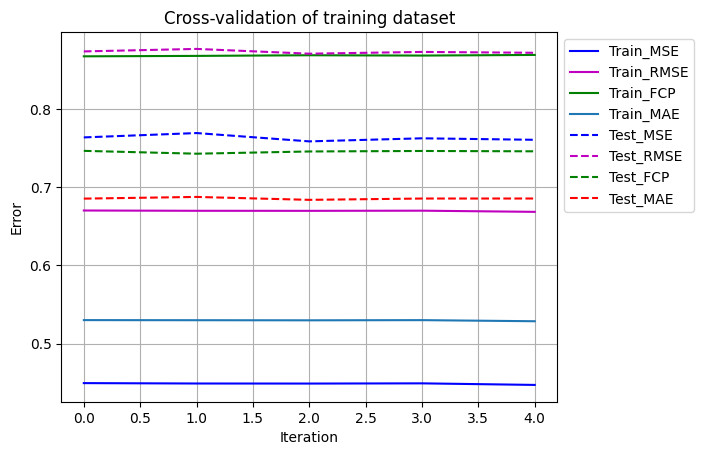

In [ ]:
plt.plot(
    metrics.index, metrics['Train_MSE'], 'b',
    metrics.index, metrics['Train_RMSE'], 'm',
    metrics.index, metrics['Train_FCP'], 'g',
    metrics.index, metrics['Train_MAE']), 'r',
plt.plot(
    metrics.index, metrics['Test_MSE'],   'b--',
    metrics.index, metrics['Test_RMSE'], 'm--',
    metrics.index, metrics['Test_FCP'],   'g--',
    metrics.index, metrics['Test_MAE'],   'r--',
)

plt.legend(['Train_MSE', 'Train_RMSE', 'Train_FCP', "Train_MAE",
            'Test_MSE', 'Test_RMSE', 'Test_FCP', "Test_MAE"],
           loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title("Cross-validation of training dataset")
plt.grid()
plt.show()

#### Using **GridSearch** training

In [ ]:
param_grid = {
        'n_factors' : [50, 100, 200],
        'n_epochs'  : [5, 10, 50],
        'lr_all'    : [5e-3, 5e-2, 5e-1],
        'reg_all'   : [2e-3, 2e-2, 2e-1],
}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, _, _ = tts(data,np.ones(shape=(len(data),)) ,test_size=.25, random_state=42)
trainset_, testset_ = Dataset.load_from_df(X_train, reader), Dataset.load_from_df(X_test, reader)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%%time
# svd_ = SVD(random_state=42) this will not work
# from surprise import SVD as svd_
# gridsearch = GridSearchCV(svd_ , param_grid,
#     measures=['rmse','mae','mse','fcp'], cv=5)
# gridsearch.fit(trainset_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 2h 27min 27s, sys: 23.2 s, total: 2h 27min 50s
Wall time: 2h 28min 48s


In [ ]:
# gridsearch.best_params

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'rmse': {'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.02},
 'mae': {'n_factors': 50, 'n_epochs': 50, 'lr_all': 0.005, 'reg_all': 0.02},
 'mse': {'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.02},
 'fcp': {'n_factors': 100, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.02}}

In [ ]:
# pd.DataFrame(gridsearch.cv_results)\
#     .sort_values('rank_test_rmse')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,...,rank_test_fcp,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_n_factors,param_n_epochs,param_lr_all,param_reg_all
37,0.907482,0.905281,0.901713,0.904800,0.906906,0.905236,0.002021,1,0.718450,0.716910,...,1,7.903051,0.122473,1.567576,0.855728,"{'n_factors': 100, 'n_epochs': 10, 'lr_all': 0...",100,10,0.005,0.020
64,0.908080,0.904329,0.901309,0.906774,0.908188,0.905736,0.002614,2,0.718470,0.716295,...,2,11.178055,0.162266,1.666999,0.847630,"{'n_factors': 200, 'n_epochs': 10, 'lr_all': 0...",200,10,0.005,0.020
10,0.908477,0.905528,0.901854,0.906997,0.907484,0.906068,0.002312,3,0.719603,0.717324,...,3,6.344402,1.000556,2.365342,1.221197,"{'n_factors': 50, 'n_epochs': 10, 'lr_all': 0....",50,10,0.005,0.020
9,0.910040,0.906864,0.903234,0.907685,0.908499,0.907264,0.002272,4,0.719558,0.717355,...,5,6.340631,1.023973,1.975557,0.881582,"{'n_factors': 50, 'n_epochs': 10, 'lr_all': 0....",50,10,0.005,0.002
36,0.911029,0.909311,0.904573,0.910592,0.909597,0.909020,0.002311,5,0.719839,0.719068,...,11,7.979699,0.169185,2.255904,1.009258,"{'n_factors': 100, 'n_epochs': 10, 'lr_all': 0...",100,10,0.005,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,1.804086,1.807043,1.799597,1.804941,1.810956,1.805325,0.003719,77,1.415878,1.419813,...,79,7.671017,0.120603,1.972946,1.063187,"{'n_factors': 100, 'n_epochs': 10, 'lr_all': 0...",100,10,0.500,0.020
42,1.804086,1.807043,1.799597,1.804941,1.810956,1.805325,0.003719,78,1.415878,1.419813,...,80,7.323959,0.351569,1.520016,0.837483,"{'n_factors': 100, 'n_epochs': 10, 'lr_all': 0...",100,10,0.500,0.002
35,1.804086,1.807043,1.799597,1.804941,1.810956,1.805325,0.003719,79,1.415878,1.419813,...,77,3.789798,0.187827,1.627571,0.911954,"{'n_factors': 100, 'n_epochs': 5, 'lr_all': 0....",100,5,0.500,0.200
17,1.804086,1.807043,1.799597,1.804941,1.810956,1.805325,0.003719,80,1.415878,1.419813,...,67,5.848090,0.378813,2.152618,1.120760,"{'n_factors': 50, 'n_epochs': 10, 'lr_all': 0....",50,10,0.500,0.200


In [ ]:
pd.DataFrame(gridsearch.cv_results).to_csv("svd_gridsearch_results.csv",index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Converting sparse matrix into CSR matrix

In [ ]:
from scipy.sparse import csr_matrix
S = csr_matrix(np.array([[1,0],[3,7]]))
print(S)

  (0, 0)	1
  (1, 0)	3
  (1, 1)	7


## Apriori, Fpgrowth and Association Rules Algorithm

### Apriori

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

frequent_movies = apriori(user_item, min_support=.20,  use_colnames=True)\
    .sort_values('support', ascending = False)\
    .reset_index(drop=True)
frequent_movies['length'] = frequent_movies['itemsets'].apply(lambda x: len(x))
frequent_movies

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.567550,(American Beauty (1999)),1
1,0.495199,(Star Wars: Episode IV - A New Hope (1977)),1
2,0.495033,(Star Wars: Episode V - The Empire Strikes Bac...,1
3,0.477318,(Star Wars: Episode VI - Return of the Jedi (1...,1
4,0.442384,(Jurassic Park (1993)),1
...,...,...,...
1075,0.200000,"(Fifth Element The (1997), Men in Black (1997))",2
1076,0.200000,"(L.A. Confidential (1997), Star Wars: Episode ...",3
1077,0.200000,(Star Wars: Episode VI - Return of the Jedi (1...,4
1078,0.200000,"(Shakespeare in Love (1998), Jurassic Park (19...",2


### fpgrowth

In [ ]:
frequent_movies_2 = fpgrowth(user_item, min_support=.15,  use_colnames=True)
frequent_movies_2['length'] = frequent_movies_2['itemsets'].apply(lambda x: len(x))
frequent_movies_2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.495199,(Star Wars: Episode IV - A New Hope (1977)),1
1,0.439238,(Saving Private Ryan (1998)),1
2,0.427649,(Back to the Future (1985)),1
3,0.416060,(Fargo (1996)),1
4,0.407119,(Sixth Sense The (1999)),1
...,...,...,...
10360,0.151325,(Star Wars: Episode V - The Empire Strikes Bac...,3
10361,0.153974,(Star Wars: Episode V - The Empire Strikes Bac...,3
10362,0.152649,"(Bull Durham (1988), Back to the Future (1985))",2
10363,0.156788,"(Apocalypse Now (1979), Star Wars: Episode V -...",2


### association rules based on apriori

In [ ]:
association_rules_ = association_rules(frequent_movies, metric='lift',
                  min_threshold=1).sort_values('lift', ascending=False)\
                  .reset_index(drop=True)

association_rules_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode VI - Return of the Jedi (1...,0.242715,0.291060,0.202649,0.834925,2.868570,0.132004,4.294655,0.860171
1,(Star Wars: Episode VI - Return of the Jedi (1...,(Star Wars: Episode V - The Empire Strikes Bac...,0.291060,0.242715,0.202649,0.696246,2.868570,0.132004,2.493084,0.918828
2,(Indiana Jones and the Last Crusade (1989)),(Star Wars: Episode VI - Return of the Jedi (1...,0.269536,0.269536,0.202649,0.751843,2.789392,0.129999,2.943551,0.878208
3,(Star Wars: Episode VI - Return of the Jedi (1...,(Indiana Jones and the Last Crusade (1989)),0.269536,0.269536,0.202649,0.751843,2.789392,0.129999,2.943551,0.878208
4,"(Jurassic Park (1993), Star Wars: Episode IV -...",(Star Wars: Episode V - The Empire Strikes Bac...,0.251656,0.293046,0.201490,0.800658,2.732189,0.127743,3.546434,0.847194
...,...,...,...,...,...,...,...,...,...,...
4605,(Alien (1979)),(American Beauty (1999)),0.335099,0.567550,0.204636,0.610672,1.075980,0.014450,1.110761,0.106203
4606,(American Beauty (1999)),(Star Wars: Episode IV - A New Hope (1977)),0.567550,0.495199,0.297185,0.523629,1.057412,0.016136,1.059681,0.125551
4607,(Star Wars: Episode IV - A New Hope (1977)),(American Beauty (1999)),0.495199,0.567550,0.297185,0.600134,1.057412,0.016136,1.081487,0.107557
4608,(Star Wars: Episode VI - Return of the Jedi (1...,(American Beauty (1999)),0.477318,0.567550,0.279139,0.584807,1.030408,0.008237,1.041566,0.056459


## **Report**
- Age group 25-34 years(group - 25) are have watched and rated the most number of movies.
- College and graduate students(group - 4) are have watched and rated the most number of movies.
- Most of the users in our dataset who've rated the movies are Male.
- Most of the movies in present in our dataset were released in 90's decade.
- American Beauty has got the most rating in total count and sum.
- People have watched movies mostly in the time slot 12 a.m.- 4a.m. and 8 p.m.-11:59 p.m.
- Most unique people like to watch the movie between 8 pm-11:59 pm, i.e. most new user like to watch movie in the evening and night slot.
- Most movie is watched on Monday.
- Most movies is watched on Monday 12 am-4 am and Sunday 12 am-4 am.
- Most movies is watched on November, 2000.
- Most unique users joined on November, 2000.
- On the basis of approach, Collaborative Filtering methods can be classified into **item-based** and **user-based**.
- Pearson Correlation ranges between **-1** to **1** whereas, Cosine Similarity belongs to the interval between **-1** to **1**.
- Top 3 movies similar to "Liar Liar (1997)"
    1. Item Based Approach(Watch option):
        1. Mrs. Doubtfire (1993)    (corr=0.576923)
        1. Dumb & Dumber (1994)     (corr=0.552042)
        1. Home Alone (1990)        (corr=0.536925)
    1. Item Based Approach(Rating option):


-